<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods:  8. Optimisation
## Non-linear fit with functions
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.optimize

import numerics.change_fonts
numerics.change_fonts.change_fontsize()

## Load and plot test data

The test data set are **beach lines** from Richmond Gulf, an area along the shores of Hudson Bay in Canada.

We load the data set with the `csv` package:

In [2]:
csvfile = open('data/fit_richmondgulf.in', newline='')
beachlines = csv.reader(csvfile)
next(beachlines)
i=0
tobs=np.array([])
terr=np.array([])
hobs=np.array([])
herr=np.array([])
for row in beachlines:
    #print (row[0].split())
    tobs = np.append(tobs,float(row[0].split()[0]))
    terr = np.append(terr,float(row[0].split()[1]))
    hobs = np.append(hobs,float(row[0].split()[2]))
    herr = np.append(herr,float(row[0].split()[3]))
    i=i+1

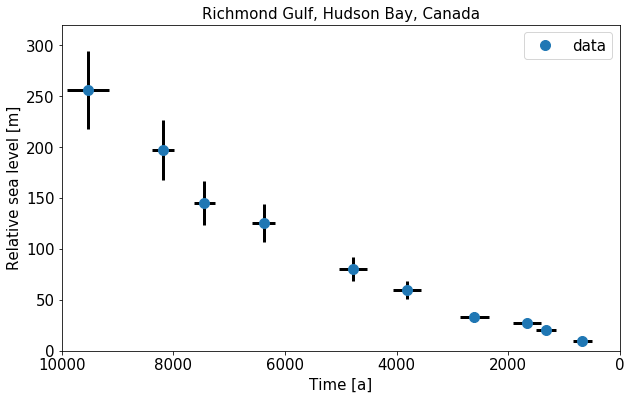

In [3]:
plt.figure(figsize=(10,6))
plt.title('Richmond Gulf, Hudson Bay, Canada')
plt.xlim([10000,0])
plt.ylim([0,320])
plt.xlabel('Time [a]')
plt.ylabel('Relative sea level [m]')
plt.errorbar(tobs,hobs,xerr=terr,yerr=herr,linewidth=0,elinewidth=3,ecolor='black')
plt.plot(tobs,hobs,linewidth=0,marker='o',markersize=10,label='data')
plt.legend()

----
## Fit with non-linear functions

As a third case, we define a **set of functions with linear coefficients** to fit our data points. 
We therefore define the **predictions** $p_i$ as
$$
p_i(a_j) = \sum\limits_{j=1}^{m} a_{2j-1} f_j(x_i,a_{2j})
$$
with $X_j(a_i)$ a set of base functions.

Inserting this prediction function into the **least-squares fit**
$$
\chi^2 = \sum\limits_{i=1}^{n} \left( \frac{o_i - p_i}{\sigma_i} \right)^2
$$
yields:
$$
\chi^2 = \sum\limits_{i=1}^{n} \left( \frac{o_i - \sum\limits_{j=1}^{m} a_{2j-1} f_j(x_i,a_{2j})}{\sigma_i} \right)^2
$$

We find the **best fit** by minimising $\chi^2$ with respect to the **model parameter vector**
$a_j$, and setting the partial derivates to zero (see lecture).

$$
p_i(a_j) = a_1 \left( e^{-{{t}\over{a_2}}}-1 \right)
$$

----
For the first example, we use the `least_squares` module from the `scipy.optimize` package ...

In [4]:
def f_exp(x,a0,a1):
    y = a0 * (np.exp(x/a1)-1.)
    return y

def f_exp_residual(a,x,y):
    y = a[0] * (np.exp(x/a[1])-1.) - y
    return y

In [23]:
coeff = scipy.optimize.least_squares(f_exp_residual, [100,8000], args=(tobs,hobs), loss='cauchy')
#coeff = scipy.optimize.least_squares(f_exp_residual, [100,8000], args=(tobs,hobs), method='lm')
#print(coeff)
print(coeff.x)

[ 124.4368079  9628.41869171]


In [24]:
n = len(tobs)
hpred = np.zeros(n)
for i in range(n):
    hpred[i] = f_exp(tobs[i],coeff.x[0],coeff.x[1])

chi2 = 0.
for i in range(n):
    chi2 = chi2 + ((hobs[i]-hpred[i])**2 / herr[i]**2)
print(chi2)
mu=1.e10
year2sec=365.25*24.*3600.
eta = coeff.x[1]*year2sec*mu
print('Viscosity [Pas]: ',eta)

5.648552132629697
Viscosity [Pas]:  3.0384978570557417e+21


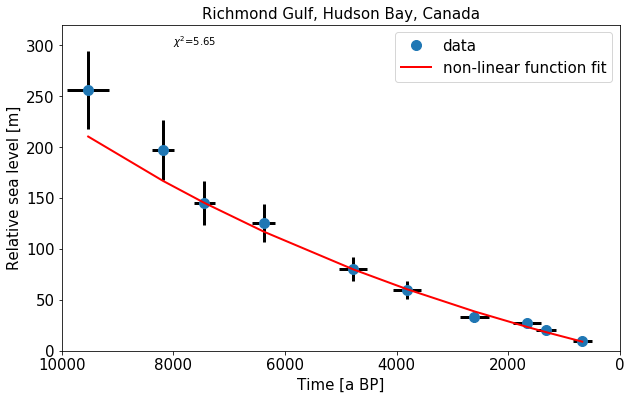

In [25]:
plt.figure(figsize=(10,6))
plt.title('Richmond Gulf, Hudson Bay, Canada')
plt.xlim([10000,0])
plt.ylim([0,320])
plt.xlabel('Time [a BP]')
plt.ylabel('Relative sea level [m]')
plt.errorbar(tobs,hobs,xerr=terr,yerr=herr,linewidth=0,elinewidth=3,ecolor='black')
plt.plot(tobs,hobs,linewidth=0,marker='o',markersize=10,label='data')
plt.plot(tobs,hpred,linewidth=2,color='red',label='non-linear function fit')
#plt.plot(tobs,ypred,label='scipy')
plt.text(8000.,300.,'$\chi^2$='+str(round(chi2,2)))
plt.legend()

----
For the second example, we use the `curve_fit` module from the `scipy.optimize` package ...

In [13]:
popt,pcov = scipy.optimize.curve_fit(f_exp,(tobs),hobs,[100,1000])
print(popt)

n = len(tobs)
hpred = np.zeros(n)
for i in range(n):
    hpred[i] = f_exp(tobs[i],popt[0],popt[1])

chi2 = 0.
for i in range(n):
    chi2 = chi2 + ((hobs[i]-hpred[i])**2 / herr[i]**2)
print(chi2)
mu=1.e10
year2sec=365.25*24.*3600.
eta = popt[1]*year2sec*mu
print('Viscosity [Pas]: ',eta)

[  62.88167395 5884.63041431]
8.320558739385627
Viscosity [Pas]:  1.857048127627643e+21


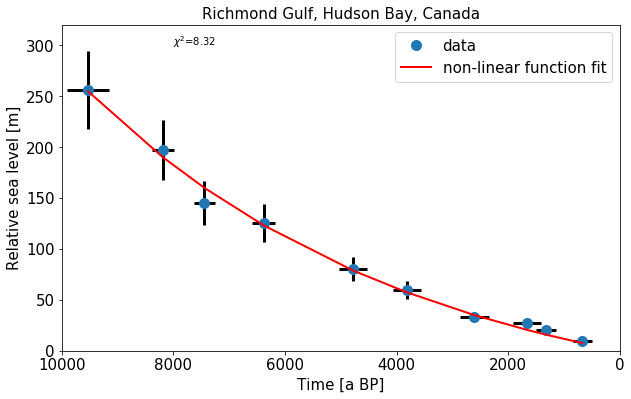

In [14]:
plt.figure(figsize=(10,6))
plt.title('Richmond Gulf, Hudson Bay, Canada')
plt.xlim([10000,0])
plt.ylim([0,320])
plt.xlabel('Time [a BP]')
plt.ylabel('Relative sea level [m]')
plt.errorbar(tobs,hobs,xerr=terr,yerr=herr,linewidth=0,elinewidth=3,ecolor='black')
plt.plot(tobs,hobs,linewidth=0,marker='o',markersize=10,label='data')
plt.plot(tobs,hpred,linewidth=2,color='red',label='non-linear function fit')
#plt.plot(tobs,ypred,label='scipy')
plt.text(8000.,300.,'$\chi^2$='+str(round(chi2,2)))
plt.legend()

----
[next>](lib08_optimisation.ipynb)